![Logical Operations](./Logical%20Operations.png)


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

(200, 499)


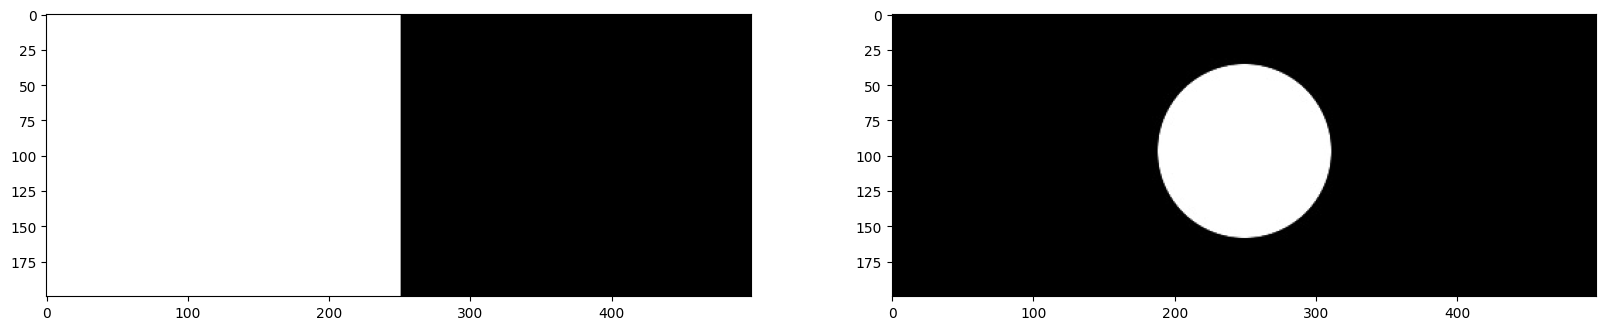

In [26]:
rectangle = cv2.imread('rectangle.jpg', cv2.IMREAD_GRAYSCALE)
circle = cv2.imread('circle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121);  plt.imshow(rectangle);
plt.subplot(122);  plt.imshow(circle);
print(rectangle.shape)

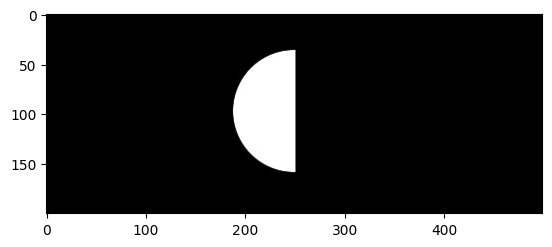

In [27]:
result = cv2.bitwise_and(rectangle, circle)
plt.imshow(result)

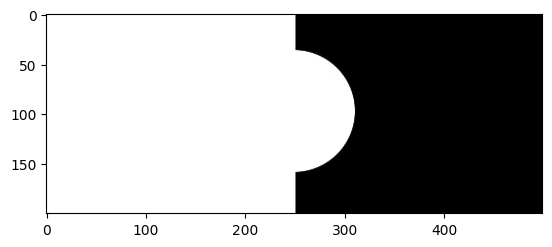

In [28]:
result = cv2.bitwise_or(rectangle, circle)
plt.imshow(result)

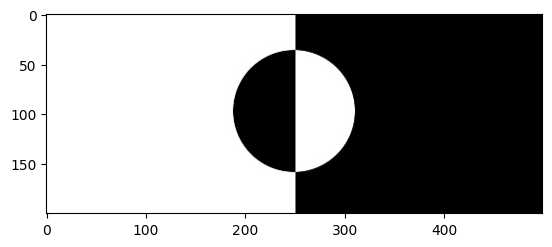

In [29]:
result = cv2.bitwise_xor(rectangle, circle)
plt.imshow(result)

(500, 500, 3)


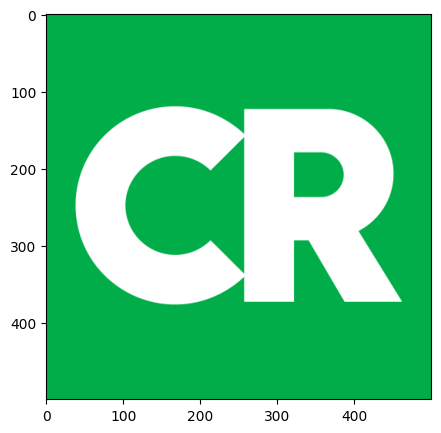

In [30]:
img_logo = cv2.imread('CR_Logo.png', cv2.IMREAD_COLOR)

print(img_logo.shape)
logo_h, logo_w, logo_c = img_logo.shape

plt.figure(figsize=[5,5])
plt.imshow(img_logo[:,:,::-1])

In [31]:
background = cv2.imread('checkerboard_color.png', cv2.IMREAD_COLOR)

print(background.shape)

(900, 900, 3)


(500, 500, 3)


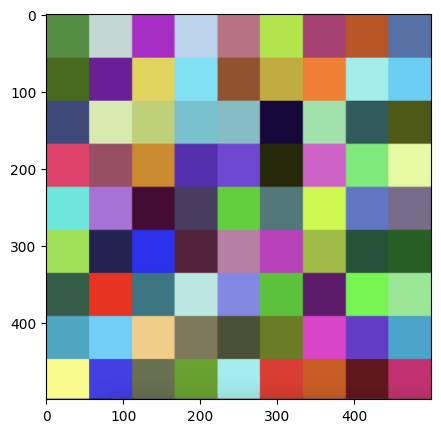

In [32]:
dim = (logo_w, logo_h)

background = cv2.resize(background, dim, interpolation = cv2.INTER_AREA)

print(background.shape)

plt.figure(figsize=[5,5])
plt.imshow(background[:,:,::-1])


(500, 500)


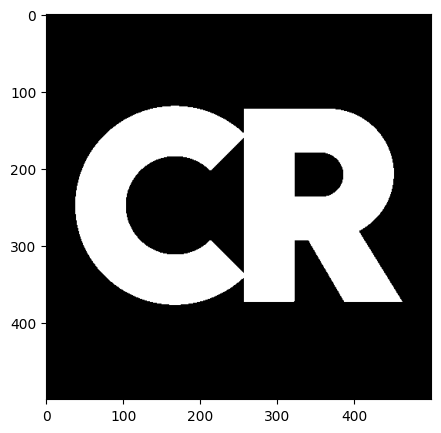

In [33]:
gray_logo = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

retval, img_logo_mask = cv2.threshold(gray_logo, 127, 255, cv2.THRESH_BINARY)

print(img_logo_mask.shape)

plt.figure(figsize=[5,5])
plt.imshow(img_logo_mask)

(500, 500, 3)


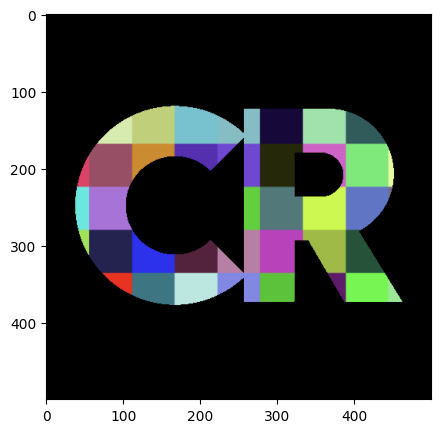

In [34]:
background = cv2.bitwise_and(background, background, mask=img_logo_mask)

print(background.shape)

plt.figure(figsize=[5,5])
plt.imshow(background[:,:,::-1])

(500, 500)


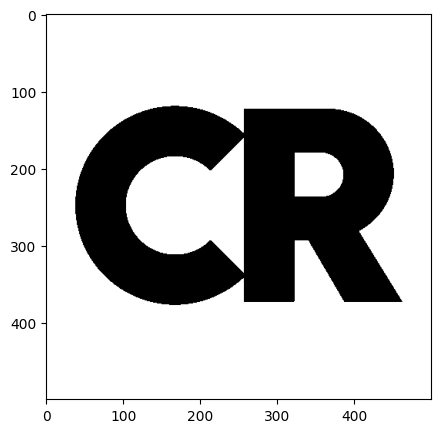

In [35]:
img_logo_mask_inv = cv2.bitwise_not(img_logo_mask)

print(img_logo_mask_inv.shape)

plt.figure(figsize=[5,5])
plt.imshow(img_logo_mask_inv)

(500, 500, 3)


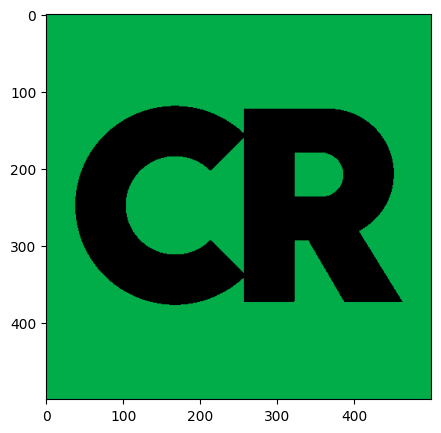

In [36]:
foreground = cv2.bitwise_and(img_logo, img_logo, mask=img_logo_mask_inv)

print(foreground.shape)

plt.figure(figsize=[5,5])
plt.imshow(foreground[:,:,::-1])

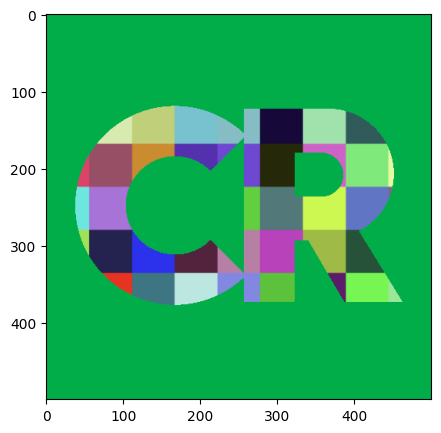

In [37]:
result = cv2.add(background, foreground)

plt.figure(figsize=[5,5])
plt.imshow(result[:,:,::-1])

### Exercise

yellow square:  (600, 600, 3)
gray circle:    (1000, 1000, 3)


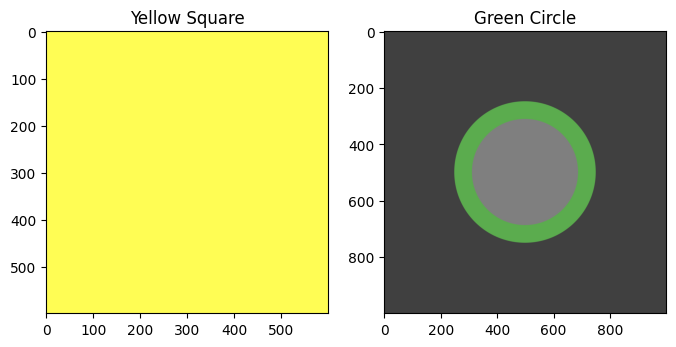

In [39]:
# Read the image of a yellow square ('yellow_square.png')
img_yellow_square = cv2.imread('yellow_square.png', cv2.IMREAD_COLOR)

# Read the image of a green/gray circle inside square.
img_green_circle = cv2.imread('green_circle.png', cv2.IMREAD_COLOR)

print('yellow square: ', img_yellow_square.shape)
print('gray circle:   ', img_green_circle.shape)

# Display both input images using matplotlib imshow().
plt.figure(figsize = (8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Yellow Square')
plt.subplot(122); plt.imshow(img_green_circle);              plt.title('Green Circle');

In [40]:
# Resize the background (yellow) image to the same size as the grayscale image.
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# Resize the yellow square.
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)

# Print the image sizes to confirm the width and height match.
print('yellow square: ', img_yellow_square.shape)
print('gray circle: ', img_green_circle.shape)

yellow square:  (1000, 1000, 3)
gray circle:  (1000, 1000, 3)


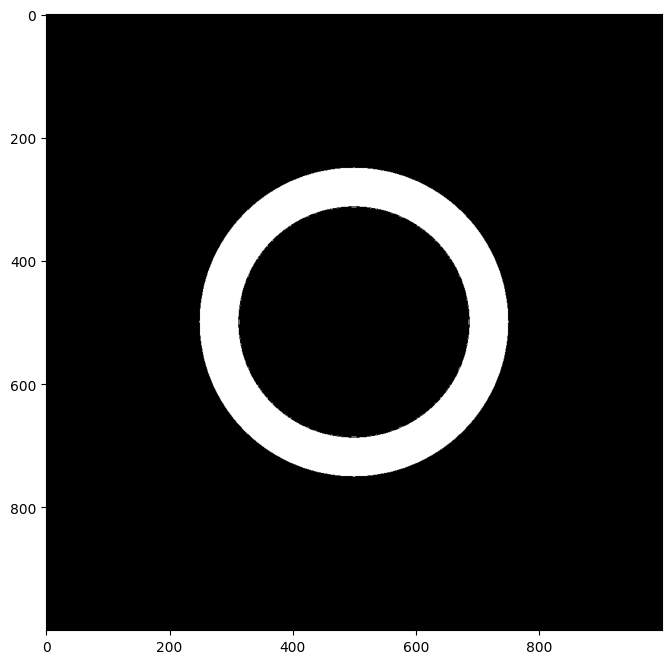

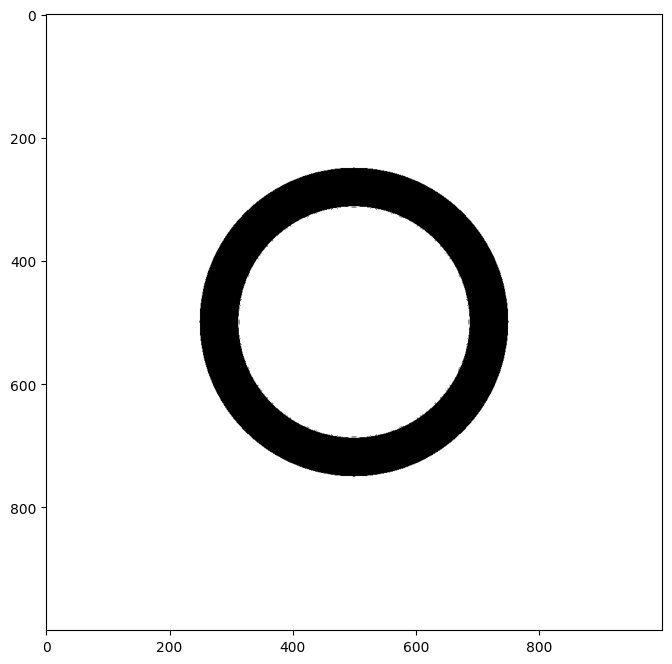

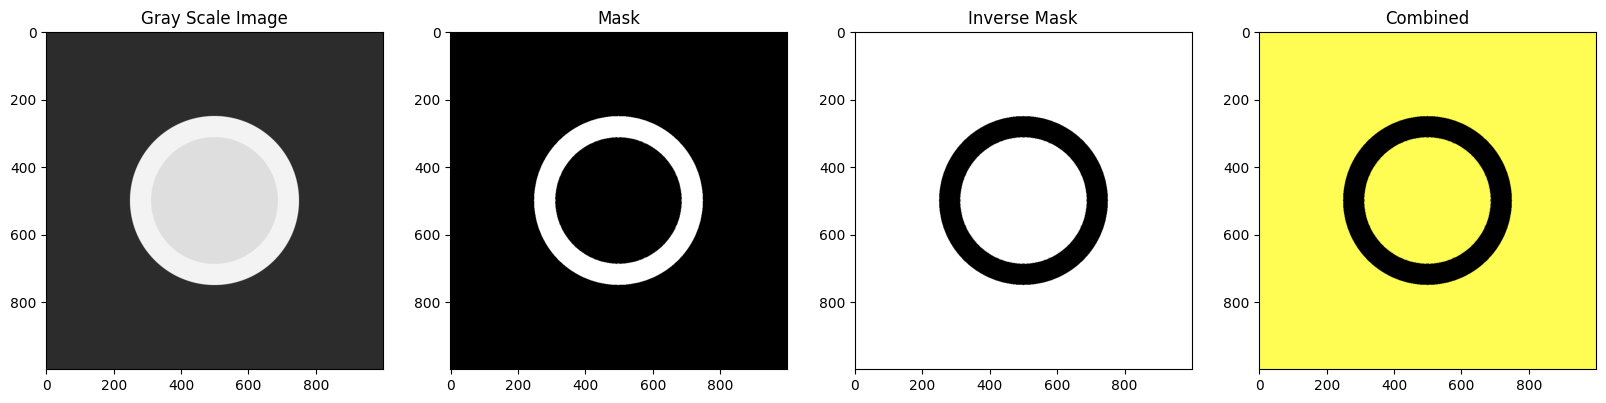

In [60]:
# Convert the green circle image to grayscale using cvtColor()
# YOUR CODE HERE
img_gray_circle = cv2.cvtColor(img_green_circle, cv2.COLOR_BGR2GRAY)

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.
# YOUR CODE HERE
retval, img_ring_mask = cv2.threshold(img_gray_circle, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize = [8,8])
plt.imshow(img_ring_mask)

# Use the bitwise_not() function to create an inverse mask.
# YOUR CODE HERE
img_ring_mask_inv = cv2.bitwise_not(img_ring_mask)

plt.figure(figsize = [8,8])
plt.imshow(img_ring_mask_inv)

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
# YOUR CODE HERE
img_combined = cv2.bitwise_and(img_yellow_square, img_yellow_square, mask=img_ring_mask_inv)

# Display the images.
# UNCOMMENT THE LINES BELOW
plt.figure(figsize = [20,10])
plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Gray Scale Image')
plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mask')
plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Inverse Mask')
plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combined');